In [1]:
import warnings
warnings.filterwarnings("ignore")

import pyspark.sql
from pyspark.sql.functions import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from prepare import wrangle_311_data

spark = pyspark.sql.SparkSession.builder.getOrCreate()

## Answer the questions below by using a combination of the techniques discussed in the lesson that you think is appropriate.

In [ ]:
# wrangling data
df = wrangle_311_data()

In [3]:
# previewing data
df.show(1, vertical=True)

-RECORD 0------------------------------------
 source_id            | svcCRMLS             
 case_id              | 1014127332           
 case_opened_date     | 2018-01-01 00:42:00  
 case_closed_date     | 2018-01-01 00:42:00  
 SLA_due_date         | 9/26/20 0:42         
 case_late            | false                
 num_days_late        | -998.5087616000001   
 case_closed          | true                 
 service_request_type | Stray Animal         
 SLA_days             | 999.0                
 case_status          | Closed               
 request_address      | 2315  EL PASO ST,... 
 council_district     | 5                    
 case_due_date        | 2018-01-01 00:42:00  
 department           | Animal Care Services 
 dept_subject_to_SLA  | true                 
 source_username      | svcCRMLS             
only showing top 1 row



### How many different cases are there, by department?

In [6]:
# observing data in DF form
(df.groupBy("department").count()).show()

+--------------------+------+
|          department| count|
+--------------------+------+
|         Solid Waste|286287|
|Animal Care Services|119362|
|Trans & Cap Impro...| 97841|
|  Parks & Recreation| 19964|
|    Customer Service|  2889|
|        Metro Health|  5313|
|        City Council|    34|
|DSD/Code Enforcement|323579|
+--------------------+------+



Text(0.5, 0, 'Number of Cases')

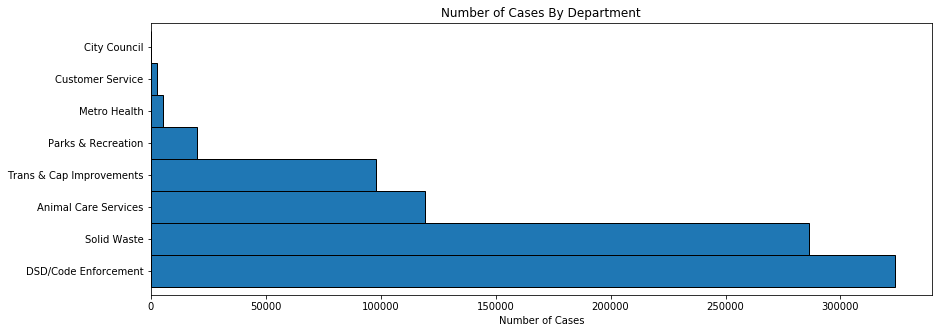

In [7]:
# using code above to aggregate
(
    df.groupBy("department")
    .count()
    # passing to pandas to create plot
    .toPandas()
    .set_index("department")["count"]
    .sort_values(ascending=False)
    .plot.barh(width=1, edgecolor="black", figsize=(14, 5))
)

# setting plot title and axis labels
plt.title("Number of Cases By Department")
plt.ylabel("")
plt.xlabel("Number of Cases")

### Does the percentage of cases that are late vary by department?

In [10]:
get_311_data()

(DataFrame[source_id: string, source_username: string],
 DataFrame[case_id: int, case_opened_date: string, case_closed_date: string, SLA_due_date: string, case_late: string, num_days_late: double, case_closed: string, dept_division: string, service_request_type: string, SLA_days: double, case_status: string, source_id: string, request_address: string, council_district: int],
 DataFrame[dept_division: string, dept_name: string, standardized_dept_name: string, dept_subject_to_SLA: string])

### On average, how late are the late cases by department?

### What is the service type that is the most late? Just for Parks & Rec?

### For the DSD/Code Enforcement department, what are the most common service request types? Look at other departments too.

### Does whether or not its a weekend matter for when a case is opened/closed?

### On average, how many cases are opened a day for the Customer Service department?

### Does the number of service requests for the solid waste department vary by day of the week?